# Markov Chain : génération de melodies

#### Importations

In [1]:
import sys
import os
import json
from visualization import *
from extract_data import *
sys.path.append('Markov/')
from markovchain import *

### Extraction des données des fichiers xml

In [2]:
'''
#Extractions des partitions a partir des fichiers xml
path_to_xml= "data/data_xml"
file_output= "data/data.json"

D= data_to_json(path_to_xml)
with open(file_output, 'w',encoding="utf-8") as f:
    json.dump(D,f,indent=2)
print(f'{file_output} with {len(D)} scores created.')
'''

'\n#Extractions des partitions a partir des fichiers xml\npath_to_xml= "data/data_xml"\nfile_output= "data/data.json"\n\nD= data_to_json(path_to_xml)\nwith open(file_output, \'w\',encoding="utf-8") as f:\n    json.dump(D,f,indent=2)\nprint(f\'{file_output} with {len(D)} scores created.\')\n'

### Extractions des mélodies

In [3]:
"""
#Extraction des melodies par partie
filename="dataset"
file_path="data/data.json"
time_signatures=set(["2/4"])

n=json_into_melody(file_path,time_signatures=time_signatures)
print(f"Toutes les melodies ({n}) ont étés générées.")
parts_len=json_into_part_melody(file_path,time_signatures=time_signatures)
print("Toutes les melodies ont étés générées par parties. Tailles des parties : "+" ".join([f"{key} : {length} " for key,length in parts_len]))
"""

'\n#Extraction des melodies par partie\nfilename="dataset"\nfile_path="data/data.json"\ntime_signatures=set(["2/4"])\n\nn=json_into_melody(file_path,time_signatures=time_signatures)\nprint(f"Toutes les melodies ({n}) ont étés générées.")\nparts_len=json_into_part_melody(file_path,time_signatures=time_signatures)\nprint("Toutes les melodies ont étés générées par parties. Tailles des parties : "+" ".join([f"{key} : {length} " for key,length in parts_len]))\n'

### Création du modèle

#### Lecture des données

In [4]:
data_path="Data/dataset.json"
with open(data_path, "r") as f:
    training_data=json.load(f)

#### Extraction des etats du modele

In [5]:
states=extract_states(training_data)

#### Creation et entrainement d'un modele sans transition vers un etat "end"

In [6]:
model=MarkovChainMelodyGenerator(states)
model.train(training_data)

#### Creation et entrainement d'un modele avec transition vers un etat "end"

In [7]:
model_end=MarkovChainMelodyGenerator(states)
model_end.train(training_data,end_transition=True)

### Génération

#### Generation et affichage brut d'une melodie

In [10]:
generated_melody = model.generate(16,mode="measure")
print(generated_melody)

['C5-0.5', 'B4-0.25', 'D5-0.25', 'F#5-0.25', 'E5-0.25', 'G5-0.25', 'B4-0.25', 'B4-0.25', 'G5-0.25', 'F#5-0.25', 'G5-0.5', 'G#5-0.25', 'E5-0.5', 'C5-0.25', 'B4-0.25', 'D5-0.25', 'D5-0.25', 'F5-0.25', 'F5-0.25', 'C#5-0.25', 'D5-0.5', 'rest-0.25', 'E5-0.5', 'B4-0.25', 'B4-2.0', 'rest-0.25', 'A4-0.25', 'F4-0.25', 'F4-0.5', 'A4-0.25', 'D5-0.25', 'B4-0.25', 'A4-0.25', 'G4-0.5', 'C5-0.5', 'E-5-0.25', 'D5-0.25', 'C5-0.25', 'D5-0.25', 'C#5-0.25', 'D4-0.25', 'G4-0.25', 'A4-0.25', 'E5-0.25', 'F5-0.25', 'F#5-0.25', 'A5-0.25', 'G5-0.25', 'F#5-0.25', 'G5-0.25', 'E5-0.25', 'D5-0.25', 'F5-0.25', 'F5-0.5', 'G5-0.5', 'C5-0.25', 'B4-0.25', 'G4-0.25', 'B-4-0.25', 'A4-0.25', 'A-4-0.25', 'G4-0.5', 'B4-0.25', 'C5-0.25', 'C5-2.0', 'B-5-1.0', 'rest-0.25', 'B-4-0.25', 'G4-0.25', 'B-4-0.25', 'rest-0.25', 'E-4-0.25', 'F#4-0.25', 'G4-0.25', 'C5-0.25', 'A4-0.25', 'B-4-0.25', 'A4-0.25', 'C#5-0.25', 'E5-0.25', 'F5-0.25', 'E5-0.5', 'D5-0.25', 'B4-0.25', 'C#5-0.25', 'B4-0.25', 'C#5-0.25', 'A4-0.25', 'rest-0.25', 'C5-0.

#### Generation d'un ensemble de melodie

In [11]:
key="F"
len_of_melodie=16
number_of_melodies=40
generated_melodies=[model_end.generate(len_of_melodie,mode="measure") for _ in range(number_of_melodies)]

### Enregistrement

In [12]:
file_output="Markov_test"
generated_to_json(file_output,generated_melodies,key=key)

### Visualisation

#### Visualisation d'une seule melodie

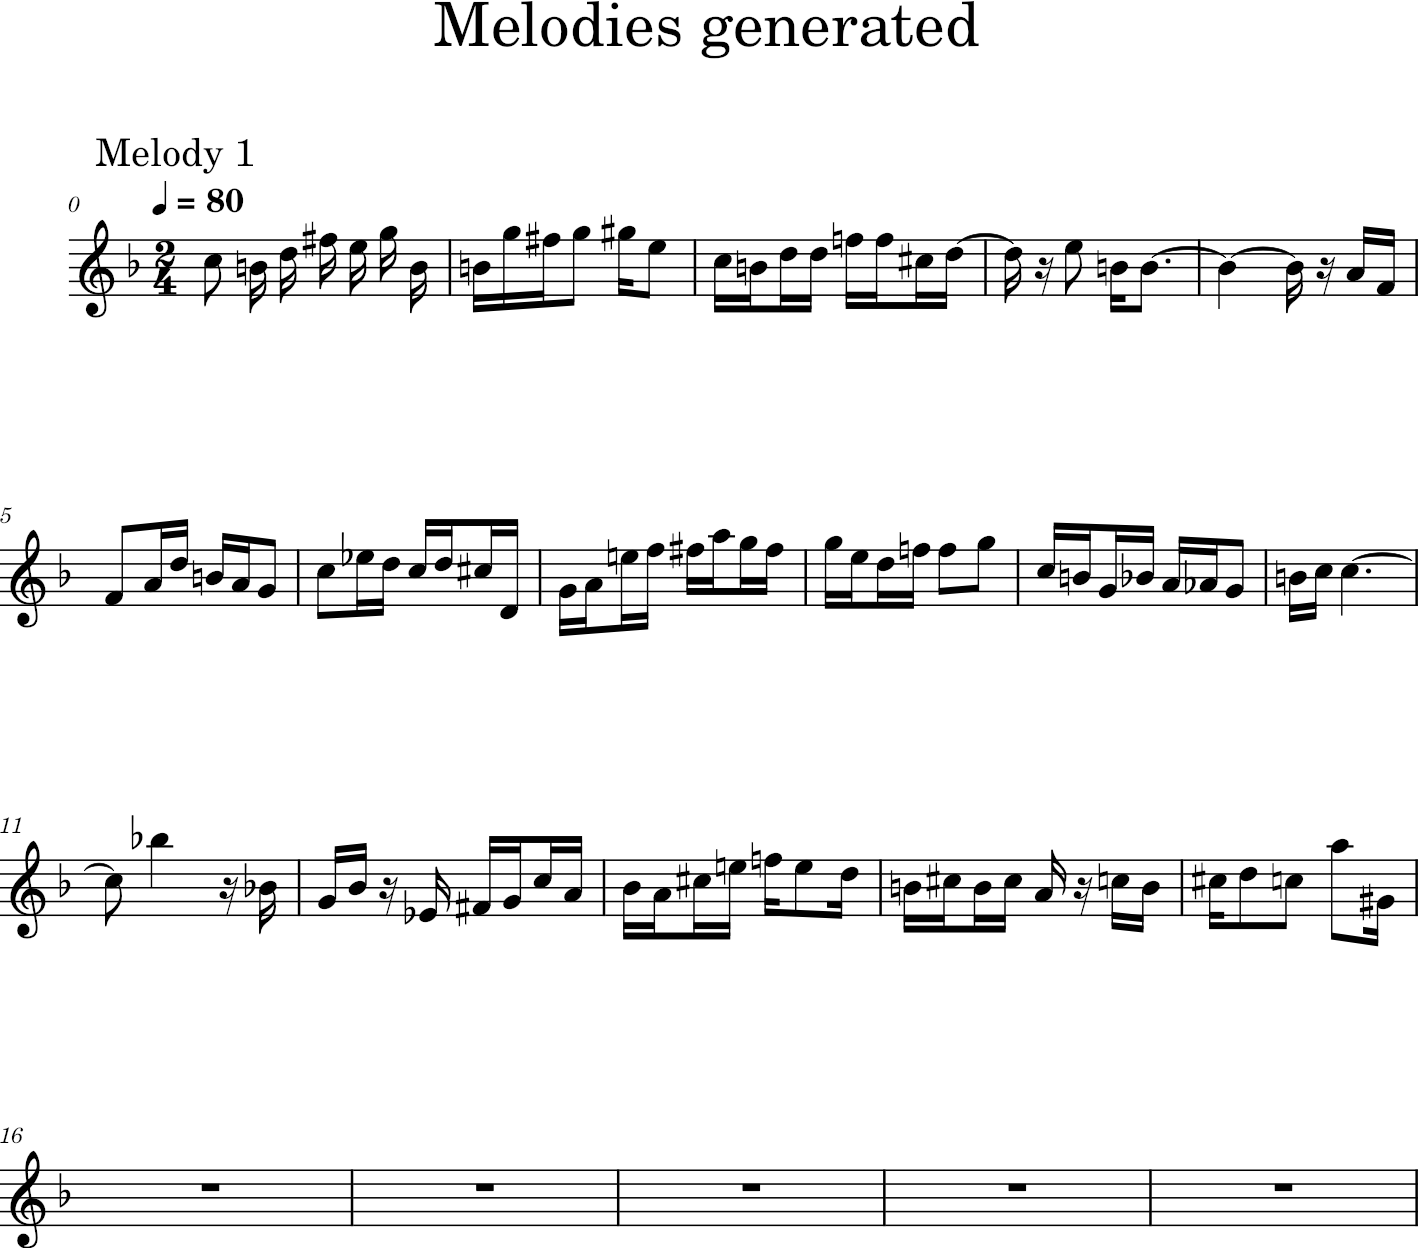

In [13]:
visualize("2/4",["F"],[generated_melody]).show()

#### Visualisation d'un ensemble de melodie

In [15]:
show_all_generated(f"Generated/{file_output}.json").show("musicxml")